In [1]:
import pandas as pd

churn_df = pd.read_csv("dataset.csv")
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Total Entries: It has 7043 rows of data, numbered from 0 to 7042.
- Total Columns: There are 21 columns in this table.
- Column Details: Each column is listed with its name, how many non-empty values it has, and its data type.
- Most columns are object type, which usually means they contain text.
- SeniorCitizen and tenure are int64 (whole numbers).
- MonthlyCharges is float64 (numbers with decimals).
- Memory Use: The table uses about 1.1 megabytes of computer memory.

In [3]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

- **TotalCharges** was originally object type, which means pandas thought it contained text.
- However, charges are numbers.
- To perform any math operations on **TotalCharges**, like finding averages, sums, or plotting it (like the box plot you saw), it needs to be recognized as a number.
- Therefore, changing it to float64 tells pandas that these are numbers with decimals, allowing proper calculations and visualizations.

# **Exploratory Data Analysis (EDA)**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

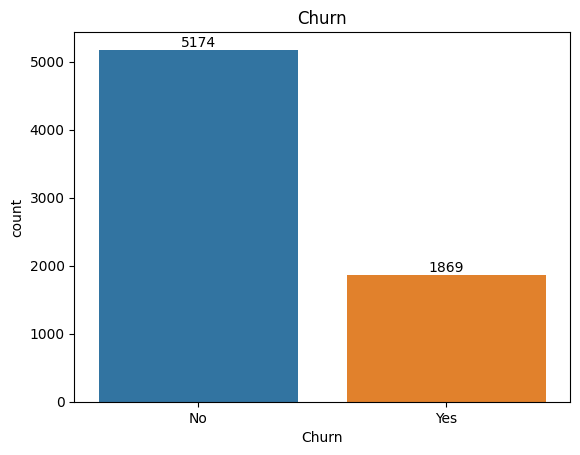

In [5]:
ax = sns.countplot(data=churn_df, x="Churn", hue="Churn", legend=False)
ax.set_title("Churn")

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

- There are more customers who have not churned (5174) than customers who have churned (1869).

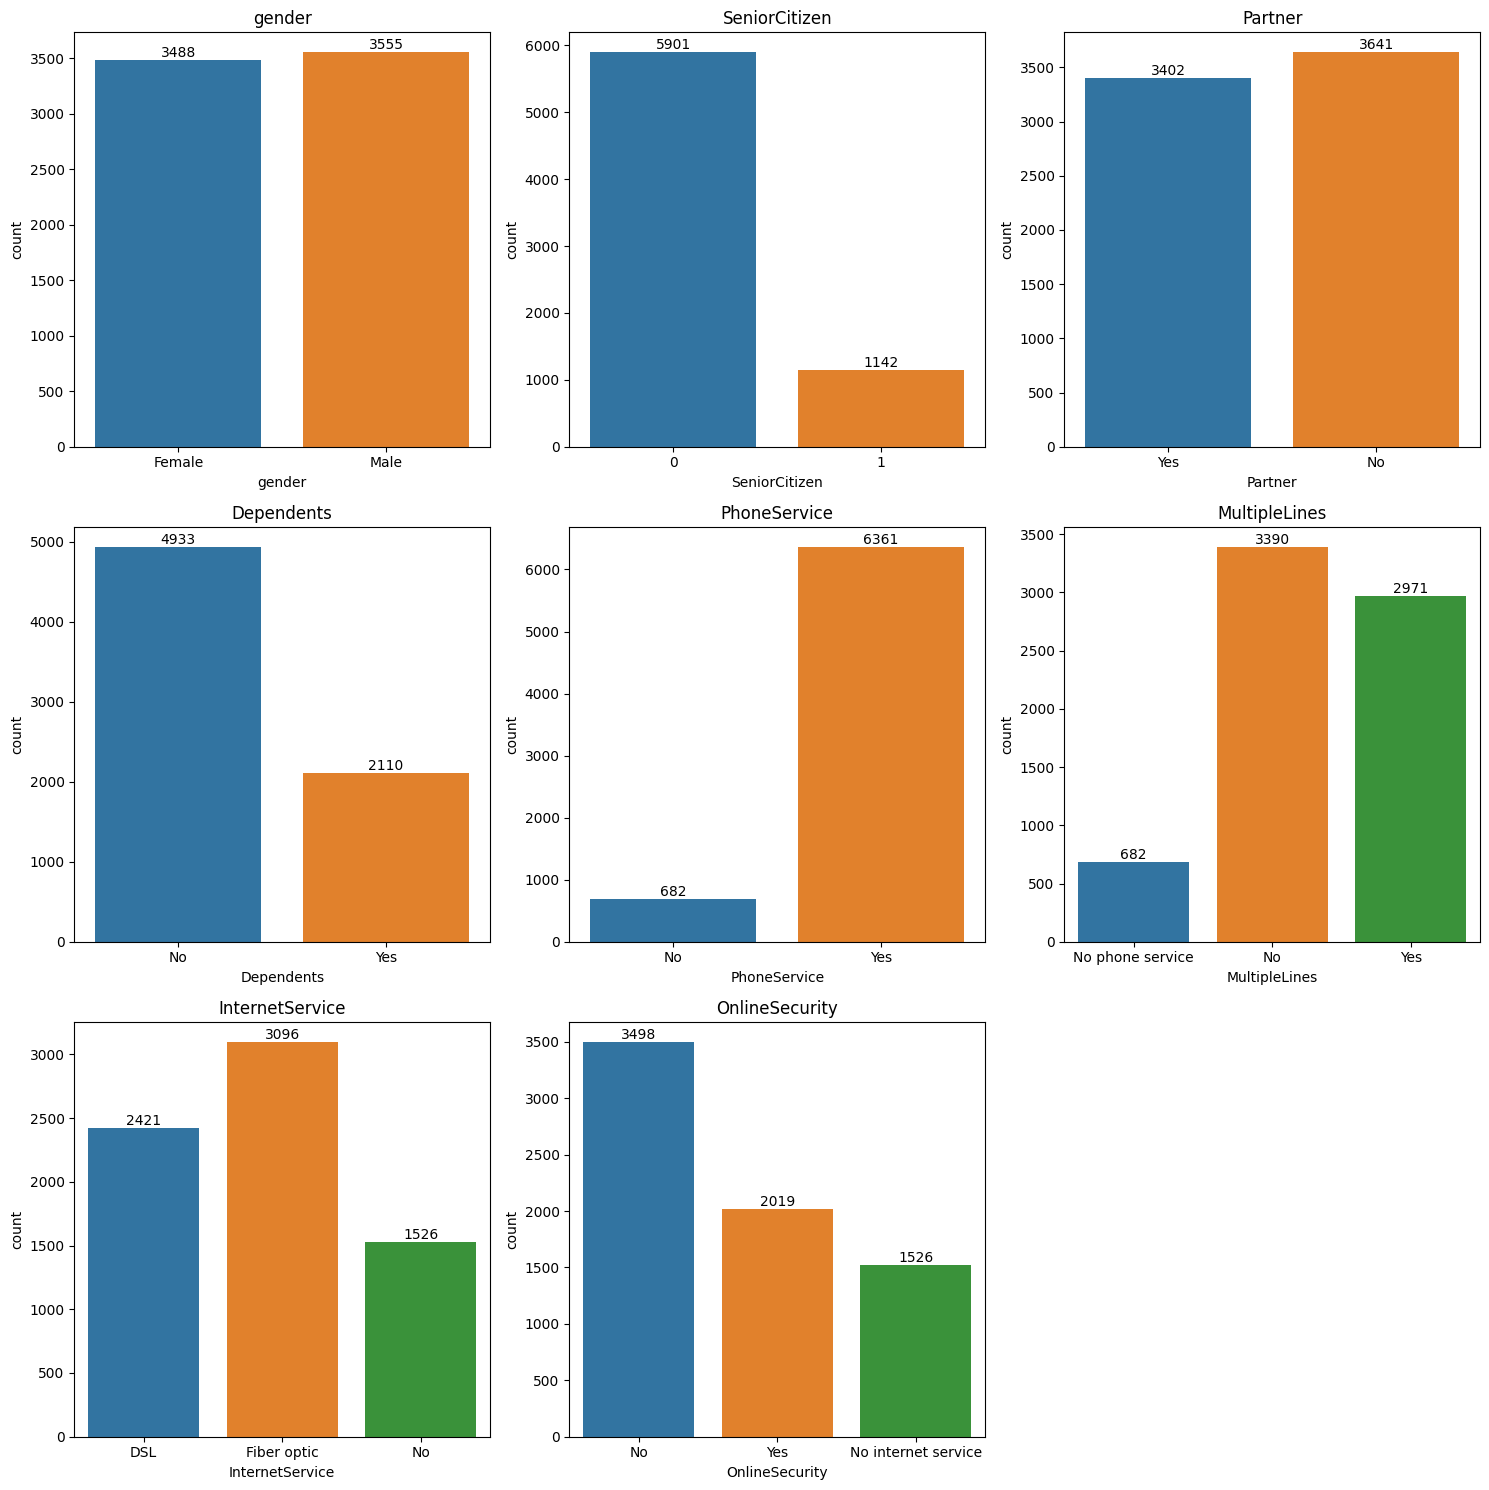

In [6]:
columns_to_plot = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
]

# Determine the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.countplot(x=col, data=churn_df, hue=col, legend=False, ax=ax)
    ax.set_title(f'{col}')

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **gender**: This chart shows that there are almost equal numbers of male and female customers, with slightly more females (3488) than males (3555).
- **SeniorCitizen**: Most customers are not senior citizens (5901), while a smaller portion are senior citizens (1142).
- **Partner**: The number of customers who have a partner (3402) is very close to those who do not (3641).
- **Dependents**: A large majority of customers do not have dependents (4933), compared to a smaller group who do (2110).
- **PhoneService**: Almost all customers have phone service (6361), with only a few who do not (682).
- **MultipleLines**: Among customers with phone service, a significant number have no multiple lines (3390), while a similar number have multiple lines (2971). A small group has no phone service at all (682).
- **InternetService**: The largest group of customers has Fiber optic internet service (3096), followed by DSL (2421). A notable portion has no internet service (1526).
- **OnlineSecurity**: Most customers do not have online security (3498). A smaller group has online security (2019), and a good number have no internet service (1526).

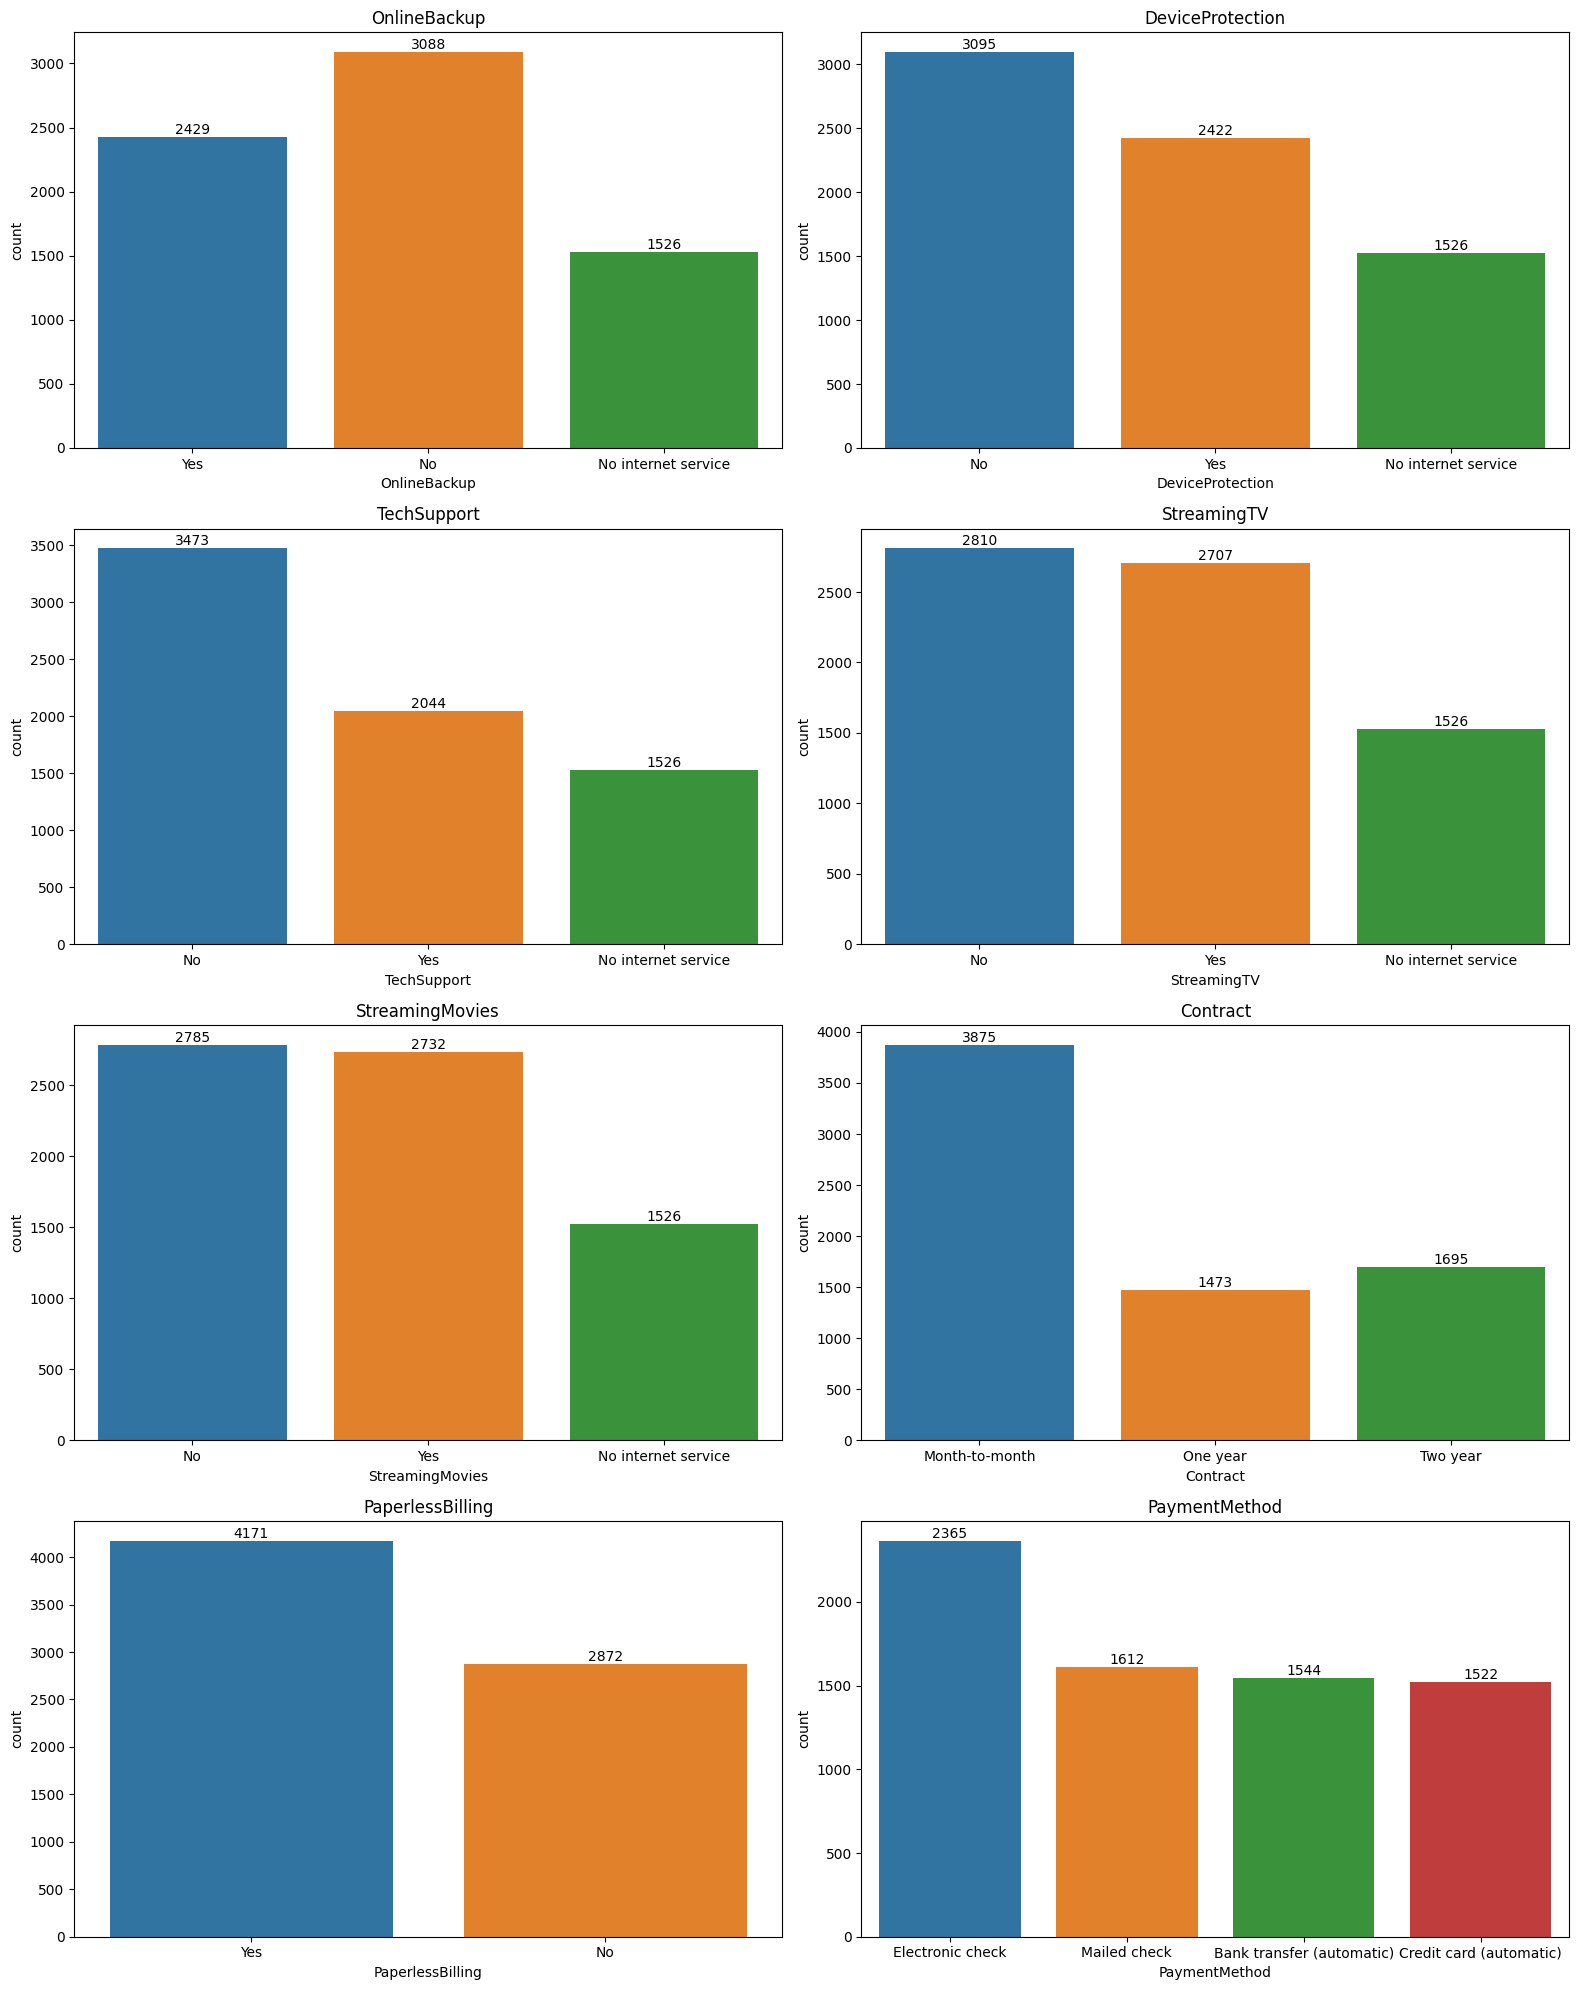

In [7]:
columns_to_plot = [
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.countplot(x=col, data=churn_df, hue=col, legend=False, ax=ax)
    ax.set_title(f'{col}')

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **OnlineBackup**: Similar to Online Security, most customers do not have online backup (3088). A smaller group has online backup (2429), and again, many have no internet service (1526).
- **DeviceProtection**: The pattern continues, with more customers not having device protection (3095) than those who do (2422). The 'No internet service' group is consistent (1526).
- **TechSupport**: A majority of customers do not have tech support (3473), while fewer do (2044). The 'No internet service' group is still present (1526).
- **StreamingTV**: There are slightly more customers who do not stream TV (2810) than those who do (2707). The 'No internet service' group (1526) remains the same.
- **StreamingMovies**: Similarly, customers who do not stream movies (2785) are slightly more than those who do (2732). The 'No internet service' group (1526) is unchanged.
- **Contract**: Most customers are on a 'Month-to-month' contract (3875), followed by 'Two year' contracts (1695), and then 'One year' contracts (1473).
- **PaperlessBilling**: More customers use paperless billing (4171) than those who do not (2872).
- **PaymentMethod**: 'Electronic check' is the most common payment method (2365), followed by 'Mailed check' (1522), and then 'Bank transfer (automatic)' (1544) and 'Credit card (automatic)' (1522), which are very similar in numbers.

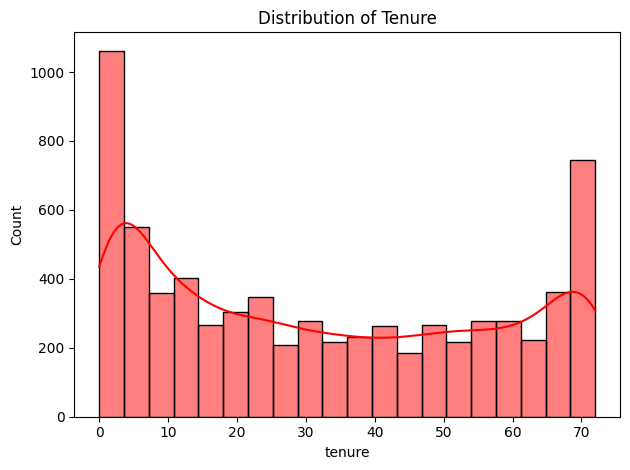

In [8]:
sns.histplot(data=churn_df, x="tenure",color = "r",bins = 20, kde = True)
plt.title('Distribution of Tenure')

plt.tight_layout()
plt.show()

The tenure graph shows how long customers have stayed with the company.

*   **Many New Customers**: There is a large number of customers who have been with the company for a very short period (less than 5 months).
*   **Many Long-Term Customers**: Another large group of customers has stayed for a long time, around 70 to 72 months.
*   **Fewer Middle-Term Customers**: The number of customers in the middle range of tenure (between roughly 10 and 60 months) is lower compared to the very new or very long-term customers.

MonthlyCharges TotalCharges

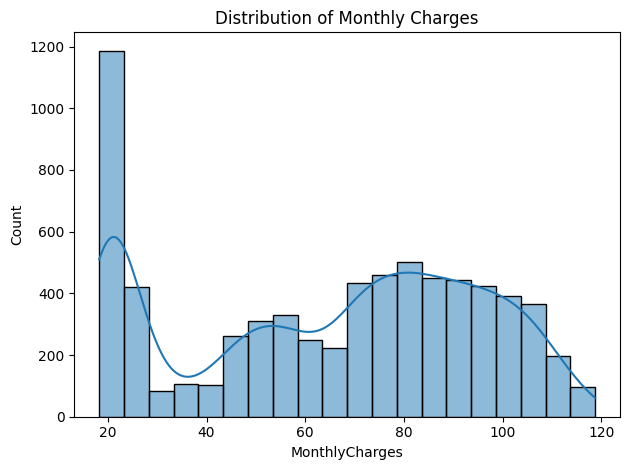

In [9]:
sns.histplot(data=churn_df, x="MonthlyCharges", bins=20, kde=True)
plt.title('Distribution of Monthly Charges')

plt.tight_layout()
plt.show()

- **MonthlyCharges**: The histogram shows two main groups of customers. One group has very low monthly charges (around $20-$$20-$25), and another significant group has much higher monthly charges (around $70-$$70-$100). This suggests that some customers might be on basic plans, while others are on more comprehensive or premium plans.

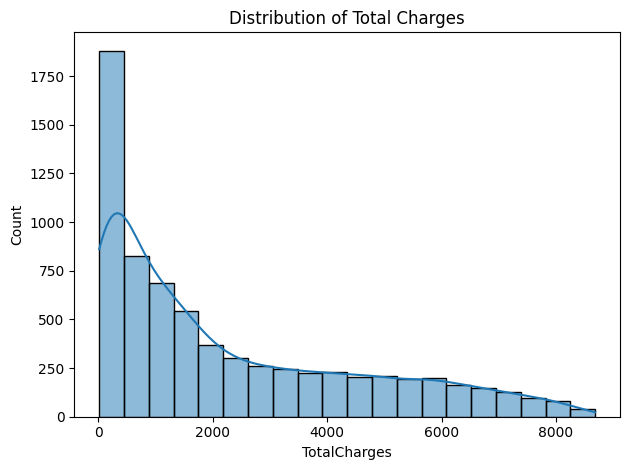

In [10]:
sns.histplot(data=churn_df, x="TotalCharges", bins=20, kde=True)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

- **TotalCharges**: The distribution is heavily skewed towards lower values. This means a large number of customers have accumulated relatively small total charges. As the total charges increase, the number of customers decreases significantly. This makes sense because new customers will have low total charges, and fewer customers stay long enough to accumulate very high total charges.

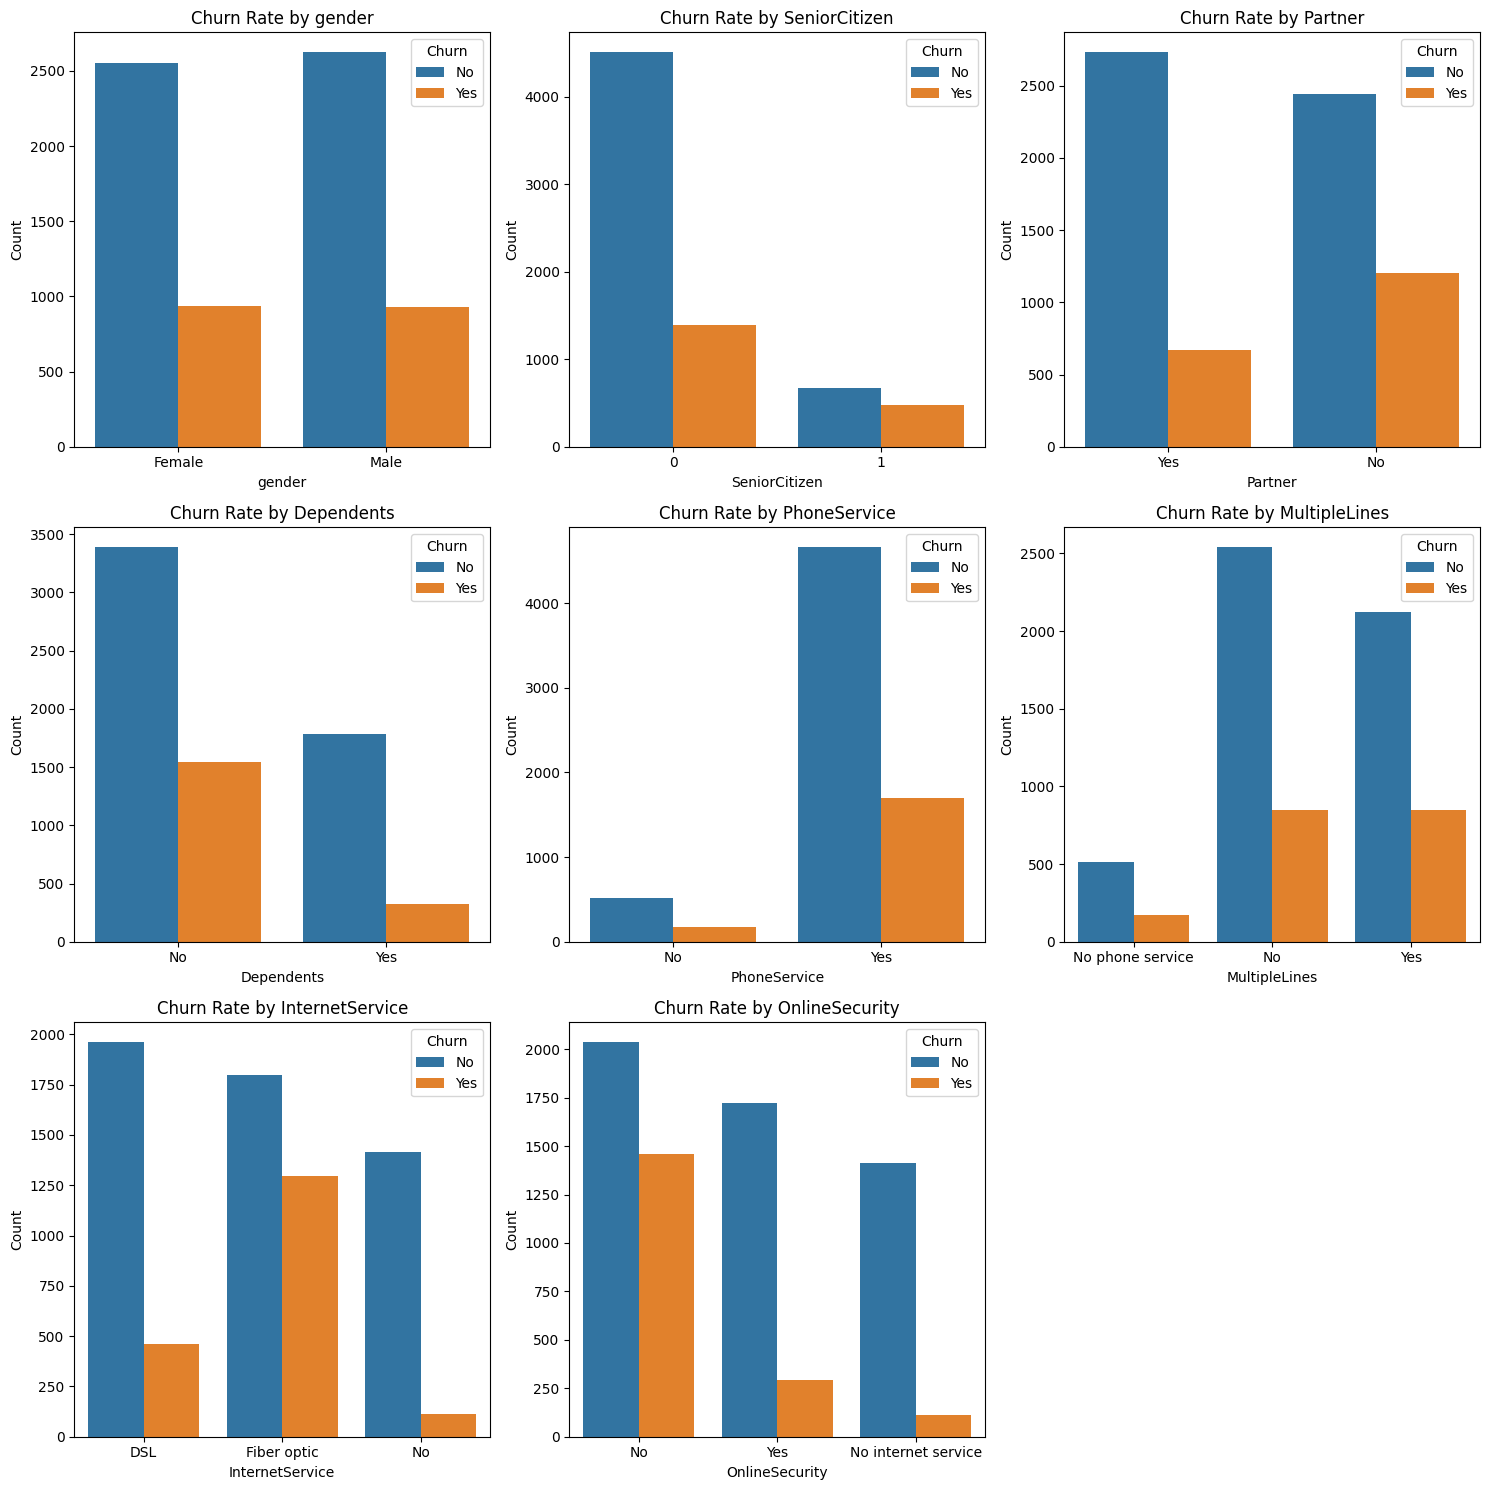

In [11]:
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity'
]

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, data=churn_df, hue='Churn', ax=ax)
    ax.set_title(f'Churn Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Gender**: Both male and female customers churn at similar rates.
- **SeniorCitizen**: Senior citizens are more likely to churn than non-senior citizens.
- **Partner**: Customers who do not have a partner are more likely to churn than those who do.
- **Dependents**: Customers without dependents churn more often than those with dependents.
- **PhoneService**: There isn't a big difference in churn rates between customers with and without phone service.
- **MultipleLines**: Churn rates are similar whether customers have multiple lines, no multiple lines, or no phone service at all.
- **InternetService**: Customers with 'Fiber optic' internet service have a higher churn rate compared to those with 'DSL' or no internet service.
- **OnlineSecurity**: Customers who do not have online security churn much more than those who do. Customers without internet service rarely churn.

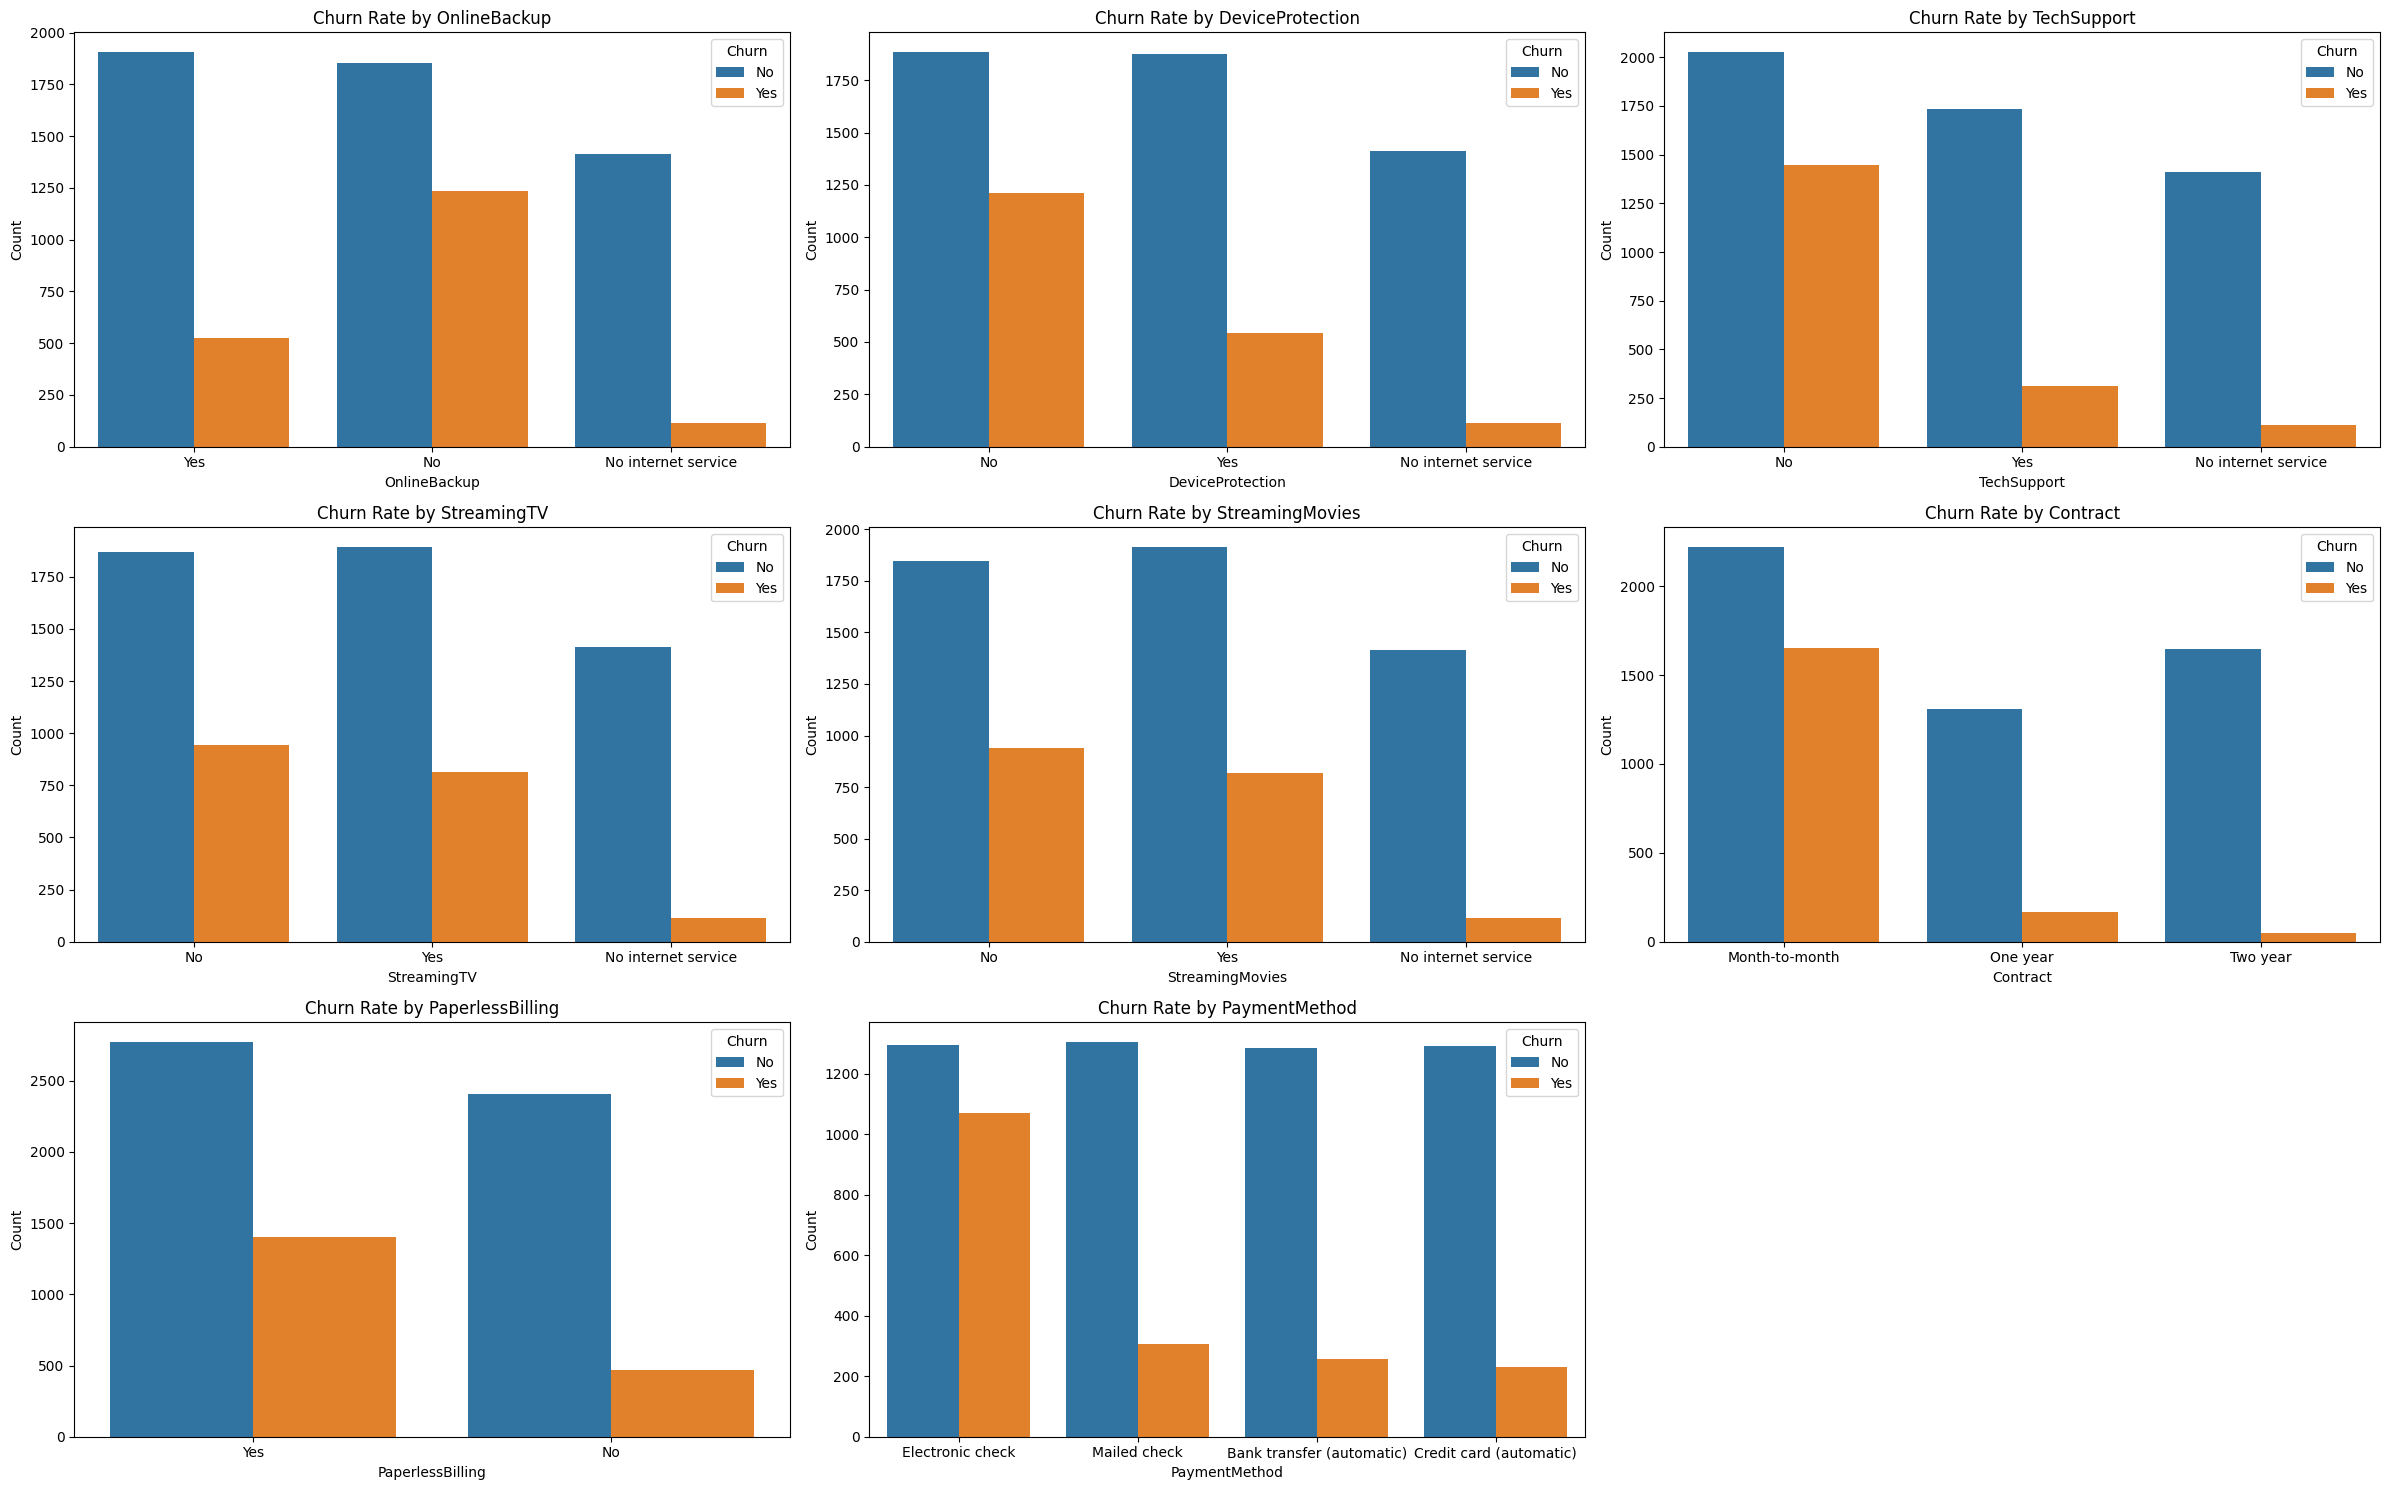

In [12]:
categorical_cols = [
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=col, data=churn_df, hue='Churn', ax=ax)
    ax.set_title(f'Churn Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='Churn')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **OnlineBackup**: Customers without online backup churn more than those with online backup. Customers without internet service rarely churn.
- **DeviceProtection**: Customers without device protection churn more than those with device protection. Customers without internet service rarely churn.
- **TechSupport**: Customers without tech support churn significantly more than those with tech support. Customers without internet service rarely churn.
- **StreamingTV**: Churn rates are similar for customers who stream TV and those who do not. Customers without internet service rarely churn.
- **StreamingMovies**: Churn rates are similar for customers who stream movies and those who do not. Customers without internet service rarely churn.
- **Contract**: Customers with 'Month-to-month' contracts have a much higher churn rate than those with 'One year' or 'Two year' contracts. 'Two year' contracts have the lowest churn.
- **PaperlessBilling**: Customers who use paperless billing are more likely to churn than those who do not.
- **PaymentMethod**: 'Electronic check' is associated with the highest churn rate among all payment methods.

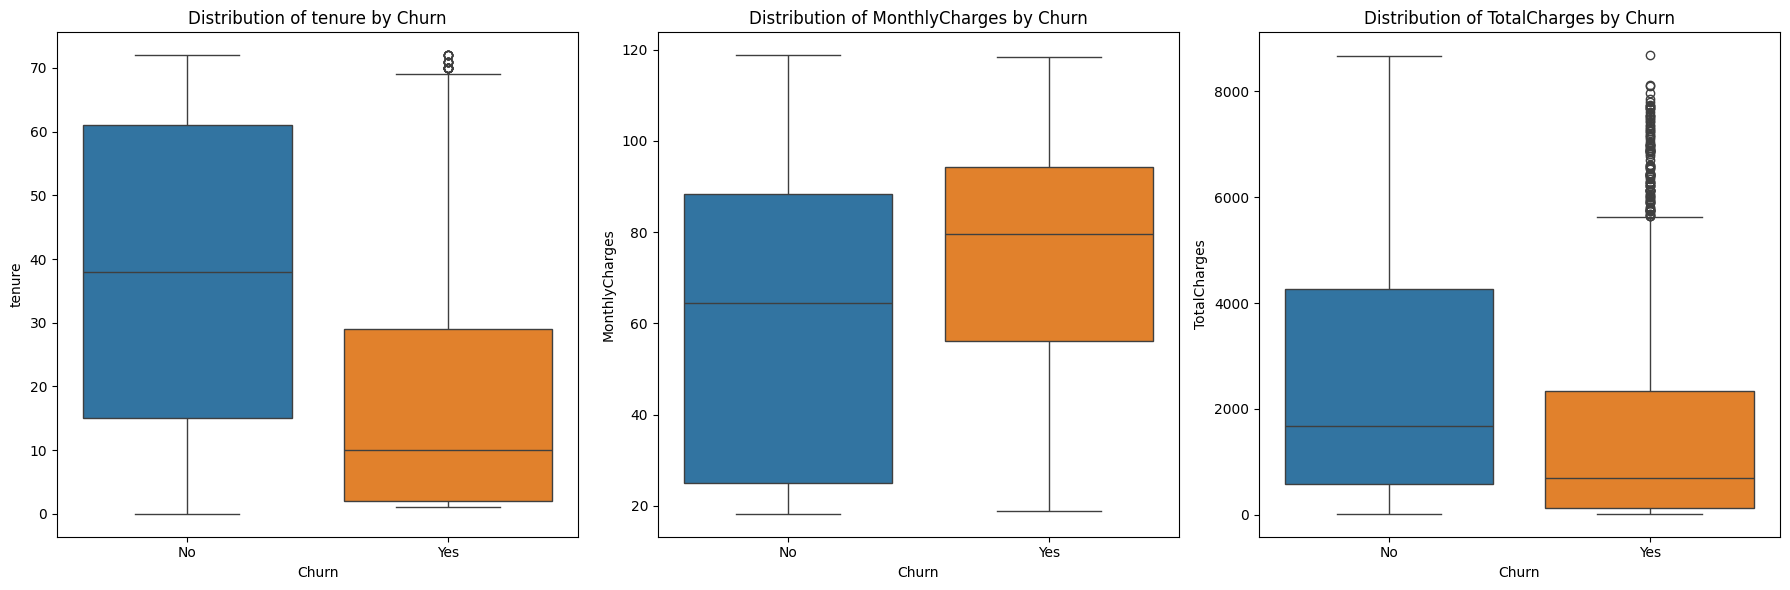

In [13]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x='Churn', y=col, data=churn_df, ax=ax, hue='Churn', legend=False)
    ax.set_title(f'Distribution of {col} by Churn')
    ax.set_xlabel('Churn')
    ax.set_ylabel(col)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here are the observations from the box plots of numerical features against 'Churn':

- **Tenure vs. Churn**: Customers with shorter tenures are much more likely to churn. The median tenure for churned customers is significantly lower than for non-churned customers. This indicates that newer customers are at a higher risk of churning.

- **MonthlyCharges vs. Churn**: Customers with higher monthly charges tend to churn more. The box plot for churned customers shows a higher median and a wider spread towards the higher end of monthly charges compared to non-churned customers. This suggests that customers paying more might be less satisfied or find better deals elsewhere.

- **TotalCharges vs. Churn**: Customers who churn generally have lower total charges. This is consistent with the observation on tenure; customers who churn earlier naturally accumulate lower total charges. Non-churned customers have a much wider distribution of total charges, extending to much higher values, reflecting their longer stay with the company.